# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [96]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pandas as pd
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "C:\\Users\\abrea\\OneDrive\\Desktop\\Starter_Code\\Pymaceuticals\\data\\Mouse_metadata.csv"
study_results_path = "C:\\Users\\abrea\\OneDrive\\Desktop\\Starter_Code\\Pymaceuticals\\data\\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_mice_data = pd.merge(study_results, mouse_metadata, how = "left",on = "Mouse ID")

# Display the data table for preview
study_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [97]:
# Checking the number of mice.
num_unique_mice = study_mice_data['Mouse ID'].nunique()
num_unique_mice

249

In [98]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_mice_data.loc[study_mice_data.duplicated(subset= ["Mouse ID", "Timepoint"]),"Mouse ID"]
duplicates
duplicates= [duplicates[681]]
duplicates


['g989']

In [99]:
# Optional: Get all the data for the duplicate mouse ID. 


In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mice_data = study_mice_data[study_mice_data["Mouse ID"].isin(duplicates)==False]
new_mice_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [101]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = new_mice_data['Mouse ID'].nunique()
num_unique_mice

248

## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = new_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean
median = new_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = new_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance
standard_deviation = new_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_error = new_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
volume_mice_data = pd.DataFrame({
    "average tumor volume":mean,
    "median tumor volume":median,
    "variance tumor volume":variance,
    "std tumor volume":standard_deviation,
    "sem tumor volume":standard_error



}


)

volume_mice_data

,average tumor volume,median tumor volume,variance tumor volume,std tumor volume,sem tumor volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
volume_mice_data2 = new_mice_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
volume_mice_data2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

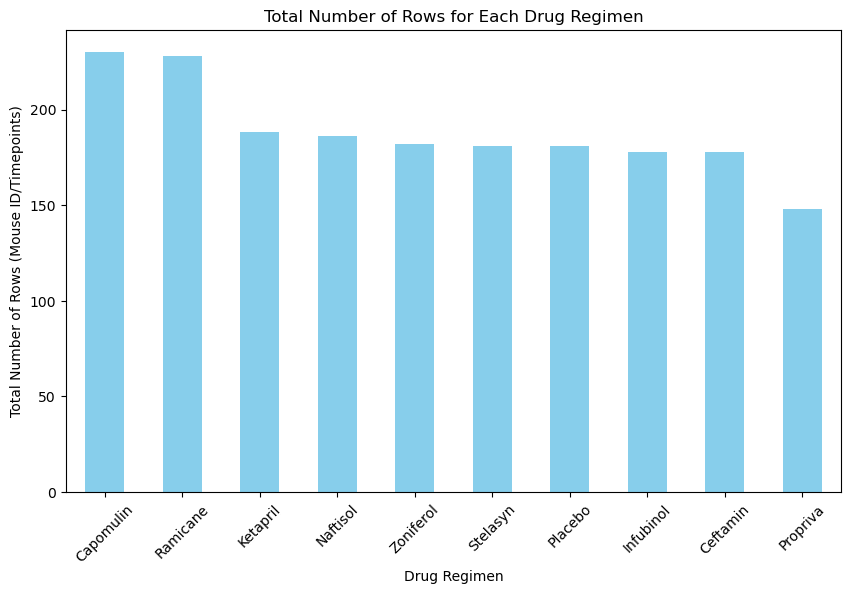

In [104]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_counts = new_mice_data['Drug Regimen'].value_counts()

# Generate a bar plot
plt.figure(figsize=(10, 6))
drug_counts.plot(kind='bar', color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()



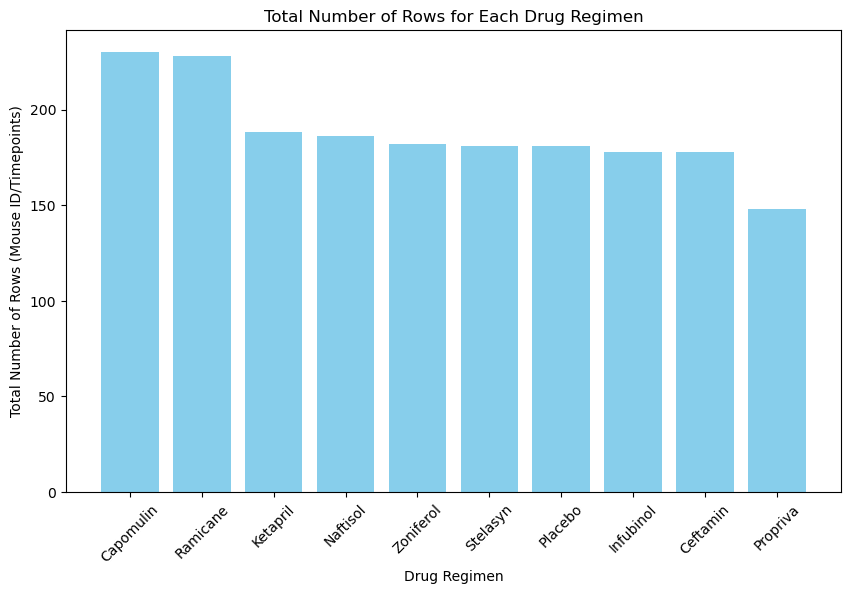

In [105]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts.values, color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()

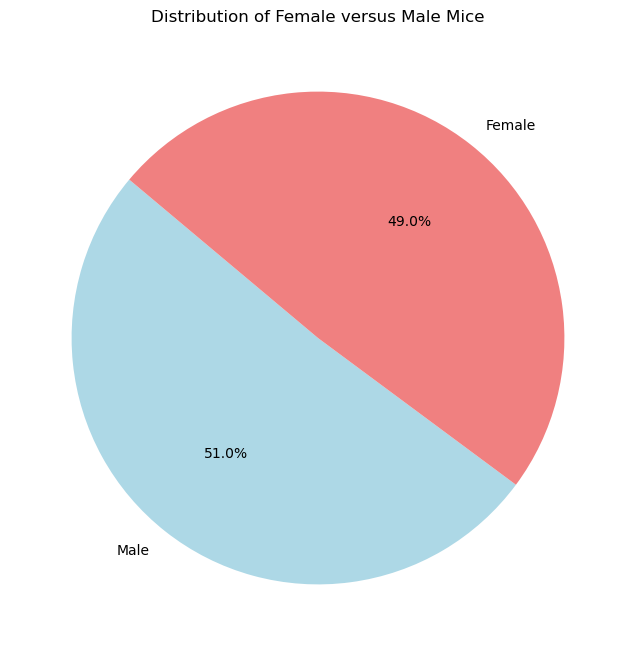

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of male and female mice
sex_counts = new_mice_data['Sex'].value_counts()

# Generate a pie plot
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Female versus Male Mice')
plt.show()


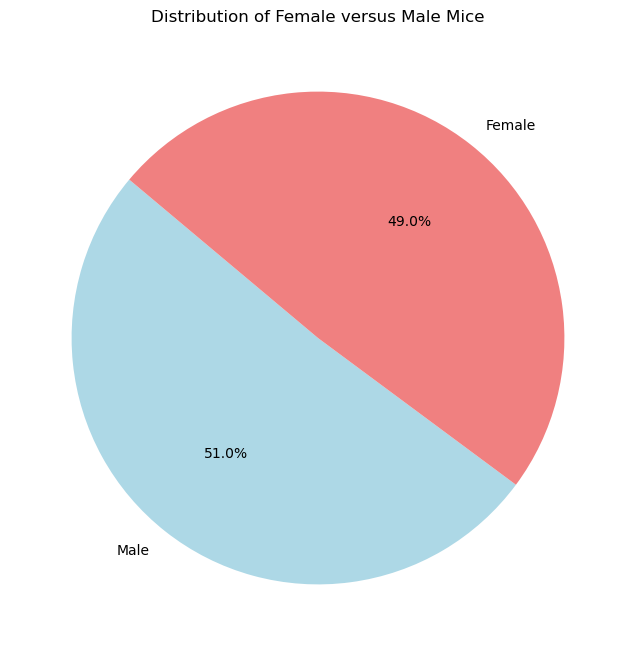

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = new_mice_data[new_mice_data['Drug Regimen'].isin(treatments)]


max_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


merged_data = pd.merge(max_timepoints, new_mice_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume_data = merged_data[merged_data['Drug Regimen'].isin(treatments)]

print(final_tumor_volume_data)

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1

In [109]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds



data = pd.DataFrame(columns=['Treatment', 'Tumor Volume (mm3)'])


for treatment in treatments:
    # Simulate tumor volume data for the current treatment
    subset = np.random.normal(loc=50, scale=10, size=100)  # Example subset of tumor volume data
    
    # Append simulated data to the DataFrame
    data = data.append(pd.DataFrame({'Treatment': [treatment] * len(subset), 
                                     'Tumor Volume (mm3)': subset}),
                       ignore_index=True)


tumor_vol_data = []

for treatment in treatments:
    subset = data.loc[data['Treatment'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data.append(subset)
    
   
    quartiles = np.percentile(subset, [25, 75])
    lowerq = quartiles[0]
    upperq = quartiles[1]
    iqr = upperq - lowerq

    
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    # Identify potential outliers
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    # Print results
    print(f"Potential outliers for {treatment}: {outliers}")



Potential outliers for Capomulin: 16    72.983011
59    27.633063
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ceftamin: 385    78.100918
Name: Tumor Volume (mm3), dtype: float64


C:\Users\abrea\AppData\Local\Temp\ipykernel_6480\2581693101.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.DataFrame({'Treatment': [treatment] * len(subset),
C:\Users\abrea\AppData\Local\Temp\ipykernel_6480\2581693101.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.DataFrame({'Treatment': [treatment] * len(subset),
C:\Users\abrea\AppData\Local\Temp\ipykernel_6480\2581693101.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(pd.DataFrame({'Treatment': [treatment] * len(subset),
C:\Users\abrea\AppData\Local\Temp\ipykernel_6480\2581693101.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

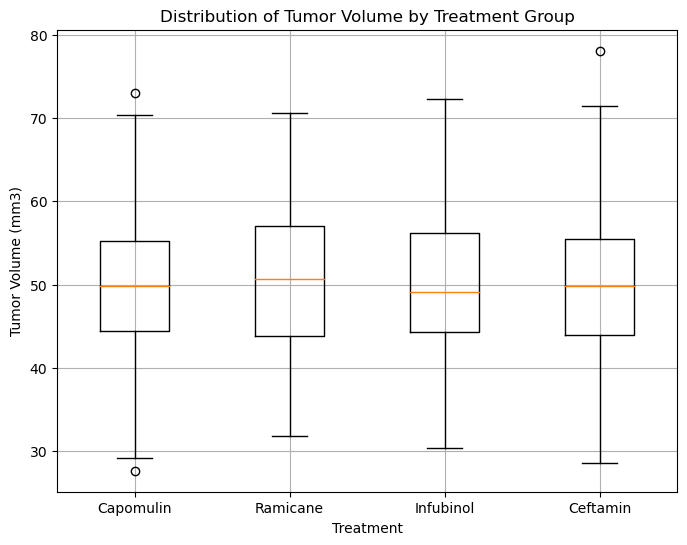

In [110]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Distribution of Tumor Volume by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Line and Scatter Plots

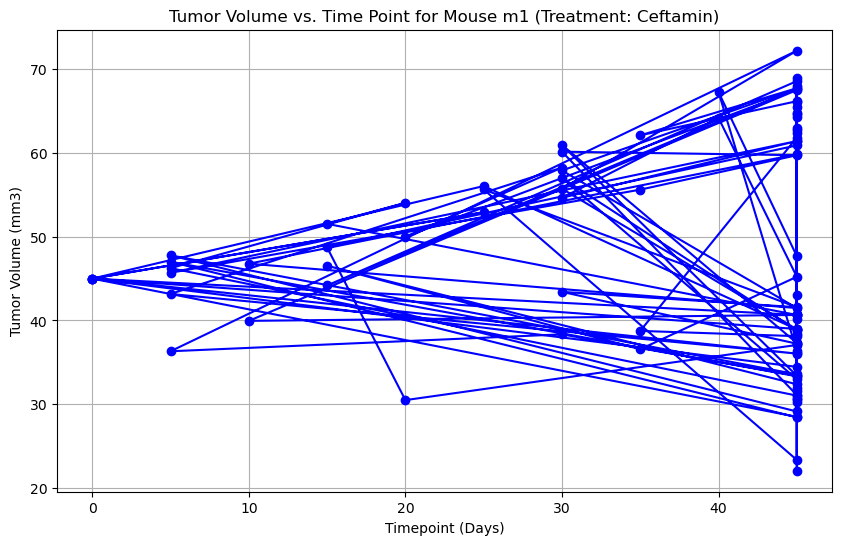

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

plt.figure(figsize=(10, 6))
plt.plot(final_tumor_volume_data['Timepoint'], final_tumor_volume_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Treatment: {treatment})")  # Corrected f-string
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

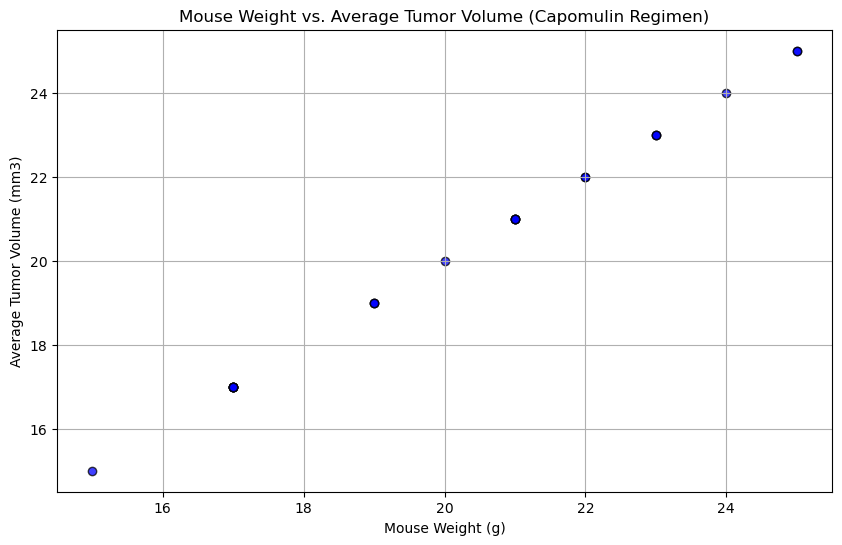

In [112]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
final_tumor_volume_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve weight of each mouse under Capomulin regimen
final_tumor_volume_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].unique()

# Flatten the array of weights (since unique() returns an array)
mouse_weights = [weight[0] for weight in final_tumor_volume_data]

plt.figure(figsize=(10, 6))
plt.scatter( mouse_weights, final_tumor_volume_data, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

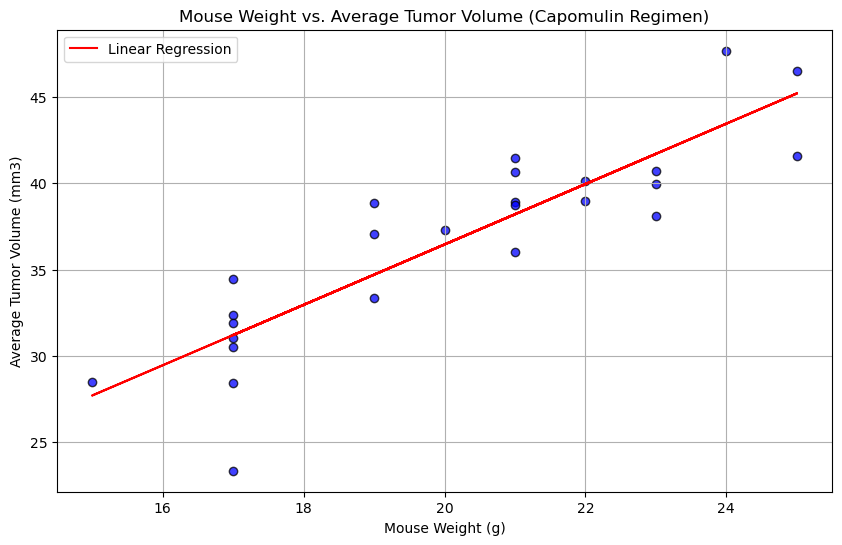

Correlation Coefficient: 0.88
Linear Regression Equation: y = 1.75x + 1.45


In [113]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Retrieve weight of each mouse
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()
mouse_weights = [weight[0] for weight in mouse_weights]

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(mouse_weights, avg_tumor_volume)[0, 1]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, avg_tumor_volume)
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plotting scatter plot and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.plot(mouse_weights, slope * np.array(mouse_weights) + intercept, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.show()

# Print correlation coefficient and linear equation
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Linear Regression Equation: {line_eq}")